In [3]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from utils.models import GAM
from utils.independence import HSIC, dHSIC

# Causal discovery methods from scratch

## Information-Geometric Causal Inference (IGCI)

Peters et al. (2017) [Elements of Causal Inference](https://library.oapen.org/bitstream/id/056a11be-ce3a-44b9-8987-a6c68fce8d9b/11283.pdf) pp. 66-67

Mooij et al. (2016) [Distinguishing Cause from Effect Using Observational Data: Methods and Benchmarks](https://jmlr.org/papers/volume17/14-518/14-518.pdf)

<br>

______________

**IGCI** *is based on the strong assumption that $X$ and $Y$ are deterministically related by a bijective function $f$, that is, $Y = f(X)$ and $X = f^{−1}(Y)$. Although its practical applicability is limited to causal relations with sufficiently small noise and sufficiently high non-linearity, **IGCI** provides a setting in which the independence of $P_X$ and $P_{Y|X}$ provably implies well-defined dependences between $P_Y$ and $P_{X|Y}$.* 

(Mooij et al., 2016)

_____________

<br>

One (though not the only) way to estimate **IGCI** is the following:
 
$$\Large C_{X \rightarrow Y} \leq C_{X \leftarrow Y}$$

where $C$ can be estimated as:

$$\large \hat{C}_{X \rightarrow Y} = \frac{1}{N-1} \sum_{j=1}^{N-1}log\frac{|y_{j+1} - y_j|}{|x_{j+1} - x_j|}$$

### Data

In [19]:
# Create data
x = np.random.randn(1000)
y = x**3 + np.random.randn(1000) 

Note that we added some **noise** to the model, which violates the assumptions. Nonetheless, the model should be robust to small amounts of noise.

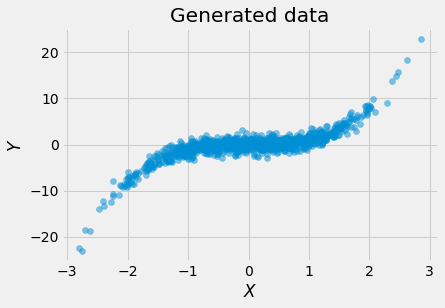

In [20]:
# Plot data
plt.scatter(x, y, alpha=.5)
plt.title('Generated data')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

In [21]:
def estimate_c(x, y):
    
    # Scale variables
    x = (x - x.min()) / (x.max() - x.min())
    y = (y - y.min()) / (y.max() - y.min())
    
    # Sort x and y (keyed by x)
    sorted_ids = np.argsort(x)
    
    x = x[sorted_ids]
    y = y[sorted_ids]
    
    sum_of_logs = 0
    
    for i in range(len(x) - 1):
        sum_of_logs += np.log(np.abs(y[i+1] - y[i]) / np.abs(x[i+1] - x[i]))
    
    return sum_of_logs / (len(x) - 1)

In [22]:
if estimate_c(x, y) <= estimate_c(y, x):
    print('X -> Y')
else:
    print('Y -> X')

X -> Y


In [23]:
estimate_c(x, y), estimate_c(y, x)

(3.6724612901327123, 6.220083613113308)